<a href="https://colab.research.google.com/github/Prathamesh326/BharatIntern/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("/Iris.csv")

In [22]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,3,4.7,3.2,1.3,0.2,Iris-setosa
2,5,NaN,3.6,1.4,0.2,Iris-setosa
3,6,5.4,3.9,1.7,0.4,Iris-setosa
4,8,5.0,3.4,1.5,0.2,Iris-setosa


In [23]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        47
Name: Species, dtype: int64

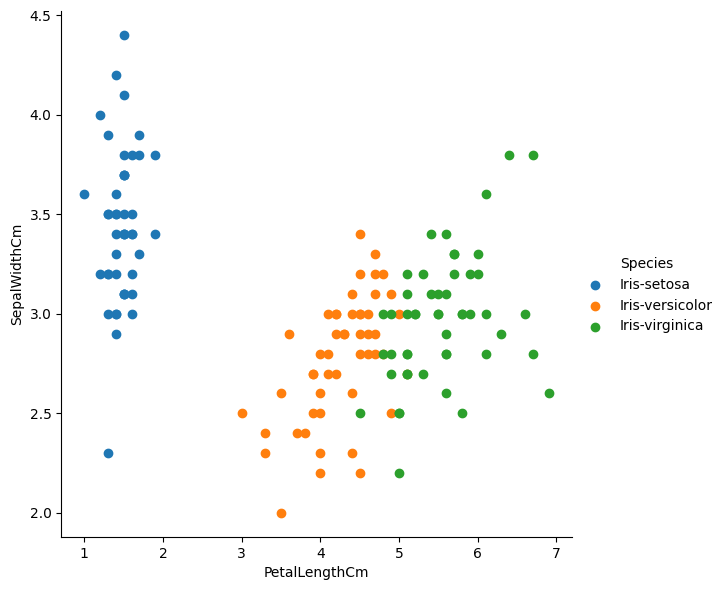

In [24]:
sns.FacetGrid(df, hue = 'Species', height = 6).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()

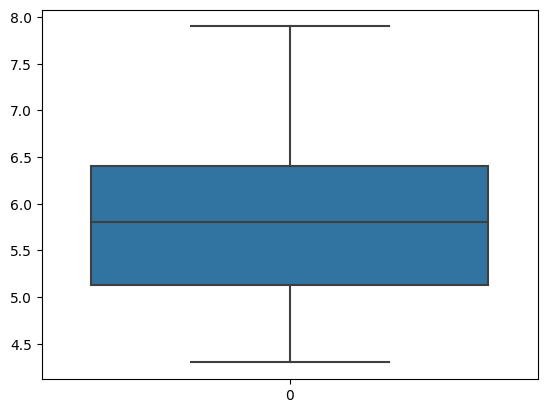

In [25]:
sns.boxplot(df['SepalLengthCm'])
plt.show()

In [26]:
#Dealing with outliers using Interquantile range

print(df['SepalLengthCm'])
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 + 1.5*IQR

0      5.1
1      4.7
2      NaN
3      5.4
4      5.0
      ... 
142    6.7
143    6.3
144    6.5
145    6.2
146    5.9
Name: SepalLengthCm, Length: 147, dtype: float64
1.2750000000000004


In [27]:
print(upper)
print(lower)

8.3125
7.0375000000000005


In [28]:
out1 = df[df['SepalLengthCm'] < lower].values
out2 = df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])

0      5.1
1      4.7
2      NaN
3      5.4
4      5.0
      ... 
142    6.7
143    6.3
144    6.5
145    6.2
146    5.9
Name: SepalLengthCm, Length: 147, dtype: float64


In [29]:
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
df['SepalLengthCm'].fillna(df['SepalLengthCm'].mean(), inplace = True)
df['SepalWidthCm'].fillna(df['SepalWidthCm'].mean(), inplace = True)
df['PetalLengthCm'].fillna(df['PetalLengthCm'].mean(), inplace = True)

logr = LogisticRegression()
pca  = PCA(n_components = 2)

In [31]:
x = df.drop('Id', axis = 1)
x = x.drop('Species', axis =1)

In [32]:
y = df['Species']

In [33]:
pca.fit(x)
x = pca.transform(x)

print(x)

[[-2.75623123e+00  3.11083202e-01]
 [-2.96004371e+00 -1.54075542e-01]
 [-2.48797091e+00  8.98581899e-01]
 [-2.35315700e+00  7.31021970e-01]
 [-2.69790079e+00  1.54752563e-01]
 [-2.95655060e+00 -5.87787337e-01]
 [-2.74452180e+00 -1.20276882e-01]
 [-2.57983740e+00  6.37551369e-01]
 [-2.68376653e+00  3.65835616e-03]
 [-2.85768956e+00 -2.41327398e-01]
 [-3.29834067e+00 -4.84582122e-01]
 [-2.71902129e+00  1.17327036e+00]
 [-2.45917673e+00  1.32630084e+00]
 [-2.69615338e+00  8.01582216e-01]
 [-2.72025136e+00  3.03495059e-01]
 [-2.27332586e+00  8.66827826e-01]
 [-2.65966854e+00  5.01745513e-01]
 [-5.64822294e-01  1.23147666e-02]
 [-2.61529992e+00  4.22193865e-01]
 [-3.28665344e+00  1.19971591e-01]
 [-2.37426684e+00  9.14715772e-02]
 [-2.42651925e+00 -4.92618286e-02]
 [-2.57859667e+00 -1.50741520e-01]
 [-2.54019197e+00  1.21936215e-01]
 [-2.63467472e+00  3.60170213e-01]
 [-2.71203506e+00  3.05846770e-01]
 [-2.70279643e+00 -2.06995727e-01]
 [-2.65860026e+00 -2.12232160e-01]
 [-2.48271140e+00  4

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size = 0.2)

In [35]:
logr.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred=logr.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0
